In [3]:
import tensorflow as tf

2022-02-21 11:13:37.311724: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [5]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2022-02-21 11:14:29.638457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 11:14:29.638739: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-02-21 11:14:29.638768: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-21 11:14:29.638787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-21 11:14:29.638795: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-21 11:14:29.638804: I tensorflow/stream_execut

In [7]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1070


In [18]:
# import the training data into df 
df = pd.read_csv('CSVFiles/training-data.csv')
df.sample(10)

,Unnamed: 0,Date,text,Sentiment
5538,5538,2019-05-21,Top 5 #cryptocurrencies \n Alert Time: 2019-05...,Negative
6913,6913,2019-05-21,"Okay, how many of us are getting more and more...",Negative
1973,1973,2019-05-27,Bitcoin [BTC]: Binance&amp;#39;s CZ and Ryan S...,Positive
2876,2876,2019-05-27,"Bitcoin Hits New 2019 High Above $8,900 - http...",Positive
4604,4604,2019-05-21,You can see Our Pro group Made Day Profit And ...,Negative
1180,1180,2019-05-27,@MustStopMurad @CNBCFastMoney Where were you w...,Positive
6386,6386,2019-05-21,Please reach out!,Negative
4874,4874,2019-05-21,Bitcoin Will Die if These 4 Problems Remain Un...,Negative
7116,7116,2019-05-21,"Bitcoin Price Blitzed $20,000, 13 Days After i...",Negative
2439,2439,2019-05-27,"#BTC #EOS Bitcoin is back and yes, it is here ...",Positive


In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Text(0.5, 0, 'Sentiment Score')

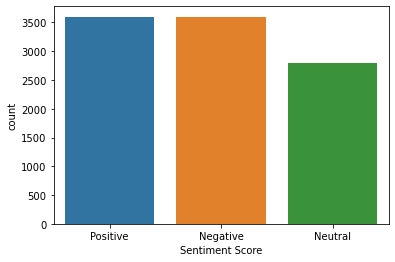

In [14]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')

In [15]:
# install hugging face library to use their transformers package 
!pip install huggingface

In [17]:
print('Number of training sentences: {:,}\n'.format(df.shape[0])) # we have 10,006 total sentences 

Number of training sentences: 10,006



In [19]:
# get lists of tweets and their sentiment labels 
tweets = df.text.values
labels = df.Sentiment.values 

In [21]:
!pip install transformers
# now we want to format our data so that VERT can use it for training 
from transformers import BertTokenizer 

# load the BERT tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

     |████████████████████████████████| 3.5 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 76 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 763 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 661 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 8.5 MB/s eta 0:00:01


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
# some sample output 
print(' Original: ', tweets[0])
print('Tokenized: ', tokenizer.tokenize(tweets[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[0])))

 Original:  @tippin_me @karozagorus I give 5 satoshis to everyone for free and without any conditions. 

So anyone can instantly start using and learning Bitcoin without any initial investment.🎉

#Bitcoin #MassAdoption #LightningNetwork
Tokenized:  ['@', 'tip', '##pin', '_', 'me', '@', 'ka', '##ro', '##za', '##gor', '##us', 'i', 'give', '5', 'sato', '##shi', '##s', 'to', 'everyone', 'for', 'free', 'and', 'without', 'any', 'conditions', '.', 'so', 'anyone', 'can', 'instantly', 'start', 'using', 'and', 'learning', 'bit', '##co', '##in', 'without', 'any', 'initial', 'investment', '.', '[UNK]', '#', 'bit', '##co', '##in', '#', 'mass', '##ado', '##ption', '#', 'lightning', '##net', '##work']
Token IDs:  [1030, 5955, 8091, 1035, 2033, 1030, 10556, 3217, 4143, 20255, 2271, 1045, 2507, 1019, 20251, 6182, 2015, 2000, 3071, 2005, 2489, 1998, 2302, 2151, 3785, 1012, 2061, 3087, 2064, 6880, 2707, 2478, 1998, 4083, 2978, 3597, 2378, 2302, 2151, 3988, 5211, 1012, 100, 1001, 2978, 3597, 2378, 1001, 3